In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")

data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [4]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, and
#### standard deviation for each pollutants verses county

#### Calculations for CO AQI:

In [5]:
# Group by County and aggregate mean, median, variance, standard deviation of the CO (Carbon Mono Oxide) Air Quality Index for each County.
stat_co_df = data_df.groupby(['County']).agg({'CO AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_co_df.head()

CO AQI                                              
               amax amin       mean median         var        std
County                                                           
Alameda        23.0  0.0   5.359788    3.0   15.648175   3.955777
Contra Costa   22.0  0.0   4.744608    5.0    6.690387   2.586578
Fresno         30.0  0.0   5.813512    3.0   30.536840   5.526015
Humboldt       18.0  0.0   4.323849    3.0    8.934409   2.989048
Imperial      106.0  0.0  14.270559   11.0  107.838063  10.384511

In [6]:
stat_co_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Alameda to Solano
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (CO AQI, amax)    16 non-null     float64
 1   (CO AQI, amin)    16 non-null     float64
 2   (CO AQI, mean)    16 non-null     float64
 3   (CO AQI, median)  16 non-null     float64
 4   (CO AQI, var)     16 non-null     float64
 5   (CO AQI, std)     16 non-null     float64
dtypes: float64(6)
memory usage: 896.0+ bytes


In [7]:
# Rename columns for mean, median, variance, standard deviation of the CO AQI (Carbon Mono Oxide Air Quality Index) for each County.

stat_co_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']
stat_co_df.head()

,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
County,,,,,,
Alameda,23.0,0.0,5.359788,3.0,15.648175,3.955777
Contra Costa,22.0,0.0,4.744608,5.0,6.690387,2.586578
Fresno,30.0,0.0,5.813512,3.0,30.536840,5.526015
Humboldt,18.0,0.0,4.323849,3.0,8.934409,2.989048
Imperial,106.0,0.0,14.270559,11.0,107.838063,10.384511


In [8]:
# Resetting the Index

co_df = stat_co_df.reset_index()
co_df.head()

,County,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,23.0,0.0,5.359788,3.0,15.648175,3.955777
1,Contra Costa,22.0,0.0,4.744608,5.0,6.690387,2.586578
2,Fresno,30.0,0.0,5.813512,3.0,30.536840,5.526015
3,Humboldt,18.0,0.0,4.323849,3.0,8.934409,2.989048
4,Imperial,106.0,0.0,14.270559,11.0,107.838063,10.384511


#### Visual Representation :

In [13]:
# Creating dataframe for two columns for plotting

max_co_aqi_df = co_df[['County', 'Mean']]
max_co_aqi_df.head()

,County,Mean
0,Alameda,5.359788
1,Contra Costa,4.744608
2,Fresno,5.813512
3,Humboldt,4.323849
4,Imperial,14.270559


#### # Creating bar Plot for Counties Vs. Average Carbon_monoxide Air Quality Index

<IPython.core.display.Javascript object>


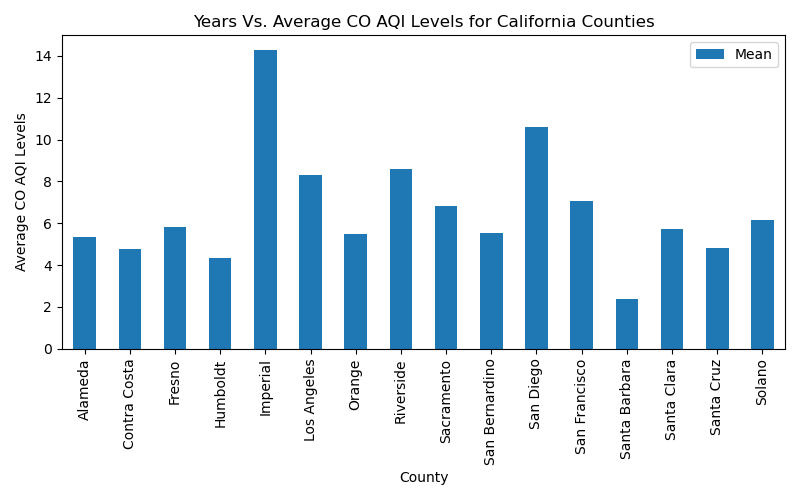

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
max_co_df.plot(kind="bar", x='County', figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Years Vs. Average CO AQI Levels for California Counties")
plt.xlabel("County")
plt.ylabel("Average CO AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/years_co.png')

#### The U.S. National Ambient Air Quality Standards for outdoor air for carbon-monoxide for 8 hours is 9 ppm(parts per million)

#### Average Carbon_monoxide Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'Imperial' county has the maximum 'Average Carbon_monoxide Air Quality Index' from (2006-2010) of 16 ppm 